In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from corr_lib import *

### Correlation matrix mean as the Frechet barycenter w.r.t 2-Wasserstein distance between centered Gaussian

Frechet barycenter of a family of measures $(\mu_i)_{i=1, \dots, n}$ is defined as 
$$
\mu^* = \min_{\mu} \sum_{i=1}^n W_2^2(\mu, \mu_i).
$$

This problem offers no analytic solutions in general, but in the case of Gaussian distributions $\mathcal{N}\big( 0, K_i\big)$, the barycenter is also Gaussian with covariance $K^*$ satisfying:

$$
K^* = \sum_{i=1}^n \big( (K^*)^{\frac{1}{2}} K_i (K^*)^{\frac{1}{2}} \big)^{\frac{1}{2}}.
$$

The solution to this equation is unique and can be computed iteratively:

$$
S^{t+1} = \bigg( \sum_{i=1}^n \big( S^t K_i S^t \big)^{\frac{1}{2}} \bigg)^{\frac{1}{2}},
$$

$$
S^t \xrightarrow[t\to +\infty]{} K^{\frac{1}{2}}
$$


In [2]:
d = 10

A = random_corr_matrix(d, id_mixing=0.3)
B = random_corr_matrix(d, id_mixing=0.3)

Kbar, errs = frechet_barycenter_corr([A, B], force_corr=True, ord='wasserstein', verbose=True)

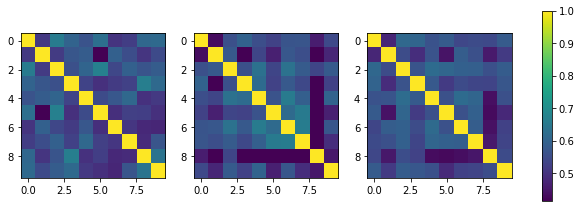

In [3]:
fig, axes = plt.subplots(figsize=(11, 7), nrows=1, ncols=3)
ax = axes[0]
im = ax.imshow(A)
clim=im.properties()['clim']

ax = axes[1]
ax.imshow(B, clim=clim)

ax = axes[2]
ax.imshow(Kbar, clim=clim)

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5)

plt.show()

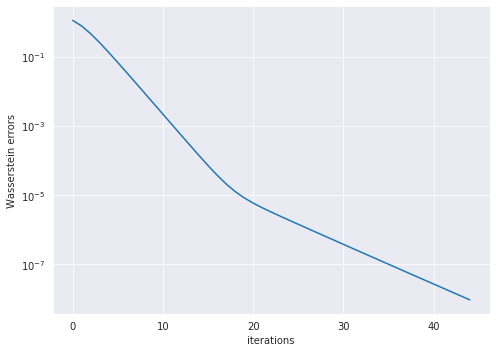

In [4]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    ax.plot(errs)
    ax.set_yscale('log')
    ax.set_xlabel('iterations')
    ax.set_ylabel('Wasserstein errors')

    plt.tight_layout()
    plt.show()